# Principal Component Analysis

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

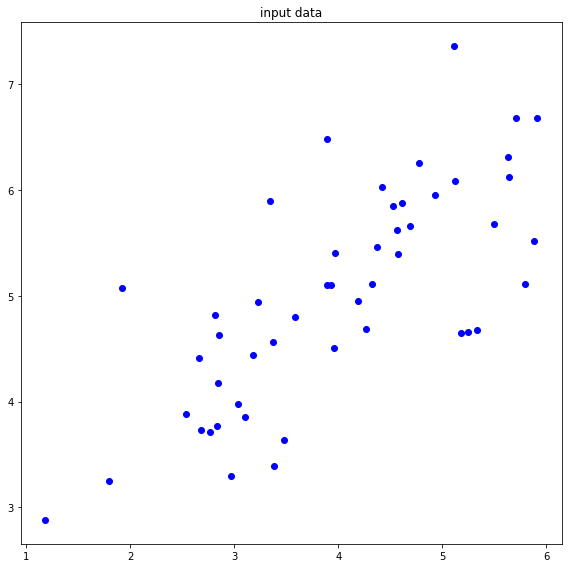

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [4]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    sum_x = feature[:,0].sum()
    sum_y = feature[:,1].sum()
    
    ave_x = sum_x / 50
    ave_y = sum_y / 50
    
    std_x = 0
    std_y = 0
    
    for i in range(feature[:,0].shape[0]):
        std_x = std_x + (feature[i,0] - ave_x) * (feature[i,0] - ave_x)
        std_y = std_y + (feature[i,1] - ave_y) * (feature[i,1] - ave_y)
    
    std_x = np.sqrt(std_x / (50))
    std_y = np.sqrt(std_y / (50))
    
    feature_normalize = np.zeros((feature[:,0].shape[0],feature[0,:].shape[0]))
    
    feature_normalize[:,0] = (feature[:,0] - ave_x) / std_x
    feature_normalize[:,1] = (feature[:,1] - ave_y) / std_y
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [5]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [6]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma = np.dot(normalize(feature).T, normalize(feature)) / (feature[:,0].shape[0])
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [7]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma = compute_covariance(normalize(feature))
    eigenvalues, eigenvectors = np.linalg.eig(Sigma)
    
    sort_down = eigenvalues.argsort()[::-1]
    
    eigenvalues  = eigenvalues [sort_down]
    eigenvectors = eigenvectors[:,sort_down]
    
    principal_component_1 = eigenvalues[0] * eigenvectors[:,0]
    principal_component_2 = eigenvalues[1] * eigenvectors[:,1]
    
    principal_component_1 = principal_component_1.reshape(2,1)
    principal_component_2 = principal_component_2.reshape(2,1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [8]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma = compute_covariance(normalize(feature))
    eigenvalues, eigenvectors = np.linalg.eig(Sigma)
    
    sort_down = eigenvalues.argsort()[::-1]
    
    eigenvalues  = eigenvalues [sort_down]
    eigenvectors = eigenvectors[:,sort_down]
    
    principal_component_1 = eigenvalues[0] * eigenvectors[:,0]
    principal_component_2 = eigenvalues[1] * eigenvectors[:,1]
    
    principal_component_1 = principal_component_1.reshape(2,1)
    principal_component_2 = principal_component_2.reshape(2,1)

    Z1 = np.dot(eigenvectors[:,0].reshape(1,2), normalize(feature).T)
    Z2 = np.dot(eigenvectors[:,1].reshape(1,2), normalize(feature).T)
 
    if vector[0] == principal_component_1[0] and vector[1] == principal_component_1[1]:
        projection = np.matmul(eigenvectors[:,0].reshape(2,1),Z1.reshape(1,50))

    if vector[0] == principal_component_2[0] and vector[1] == principal_component_2[1]:
        projection = np.matmul(eigenvectors[:,1].reshape(2,1),Z2.reshape(1,50))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

## compute the principal components and the projection of feature

In [9]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

---

## functions for presenting the results

---

---

In [10]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [11]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    
    plt.arrow(x=0,y=0,dx=principal_component_1[0][0],dy=principal_component_1[1][0], width=0.05, facecolor='red', edgecolor='None')
    plt.arrow(x=0,y=0,dx=principal_component_2[0][0],dy=principal_component_2[1][0], width=0.05, facecolor='green', edgecolor='None')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [12]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    
    yy = np.linspace(-10+min_y, 10+max_y, 1000)
    xx = (principal_component_1[0][0] / principal_component_1[1][0]) * yy
    
    plt.plot(xx,yy, color='red')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [13]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    
    yy = np.linspace(-10+min_y, 10+max_y, 1000)
    xx = (principal_component_2[0][0] / principal_component_2[1][0]) * yy
    
    plt.plot(xx,yy, color='red')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [14]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    
    yy = np.linspace(-10+min_y, 10+max_y, 1000)
    xx = (principal_component_1[0][0] / principal_component_1[1][0]) * yy
    
    plt.plot(xx,yy, color='red')
    
    plt.plot(projection1[0], projection1[1], 'o', color='green')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [15]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    
    yy = np.linspace(-10+min_y, 10+max_y, 1000)
    xx = (principal_component_2[0][0] / principal_component_2[1][0]) * yy
    
    plt.plot(xx,yy, color='red')
    
    plt.plot(projection2[0], projection2[1], 'o', color='green')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [16]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    
    yy = np.linspace(-10+min_y, 10+max_y, 1000)
    xx = (principal_component_1[0][0] / principal_component_1[1][0]) * yy
    
    plt.plot(xx,yy, color='red')
    
    plt.plot(projection1[0], projection1[1], 'o', color='green')
    
    for i in range(50):
        plt.plot([x[i],projection1[0][i]],[y[i],projection1[1][i]], color='gray')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [17]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.scatter(x, y, color='blue')
    
    yy = np.linspace(-10+min_y, 10+max_y, 1000)
    xx = (principal_component_2[0][0] / principal_component_2[1][0]) * yy
    
    plt.plot(xx,yy, color='red')
    
    plt.plot(projection2[0], projection2[1], 'o', color='green')
    
    for i in range(50):
        plt.plot([x[i],projection2[0][i]],[y[i],projection2[1][i]], color='gray')
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


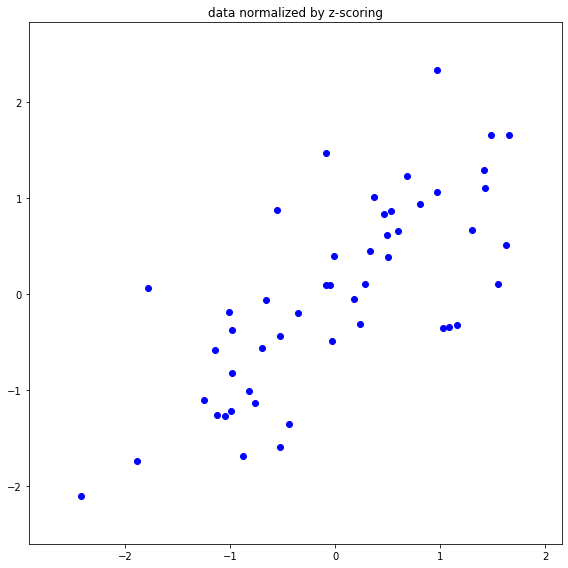

**************************************************
## [RESULT 02]
**************************************************


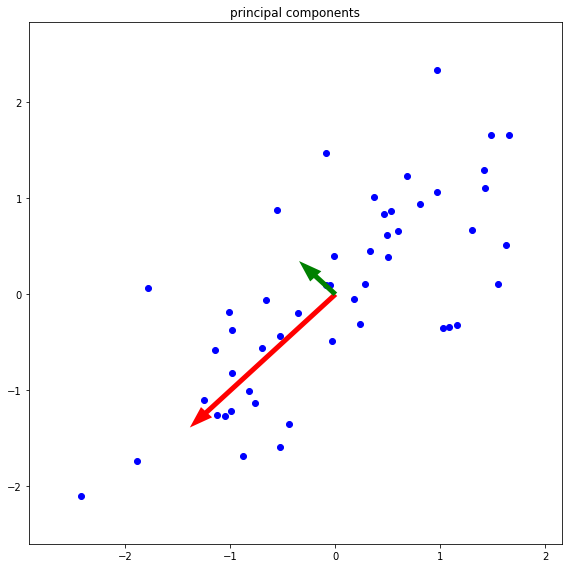

**************************************************
## [RESULT 03]
**************************************************


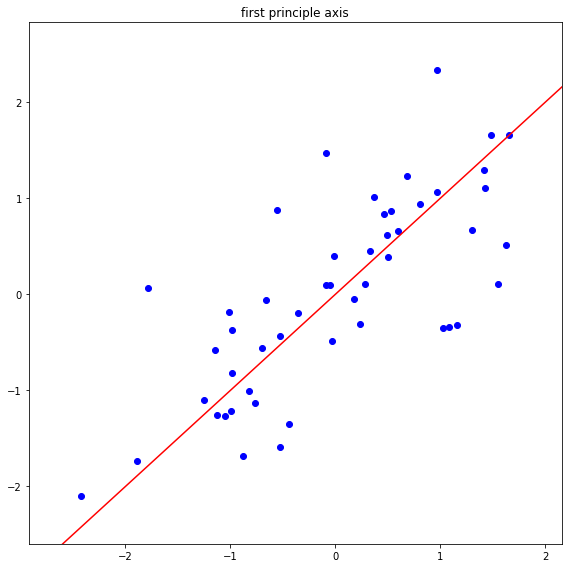

**************************************************
## [RESULT 04]
**************************************************


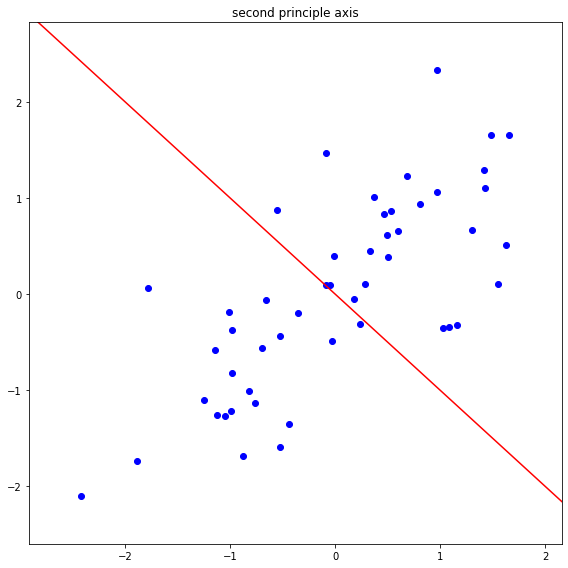

**************************************************
## [RESULT 05]
**************************************************


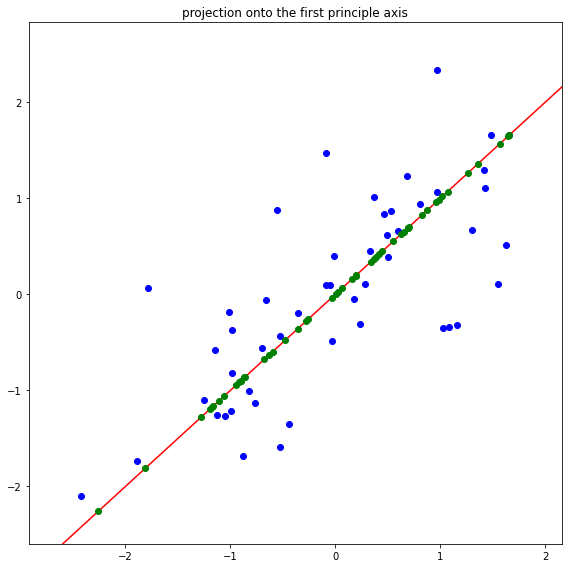

**************************************************
## [RESULT 06]
**************************************************


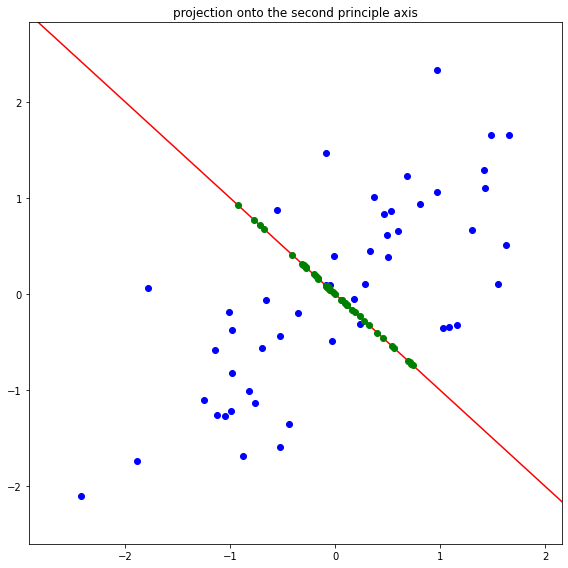

**************************************************
## [RESULT 07]
**************************************************


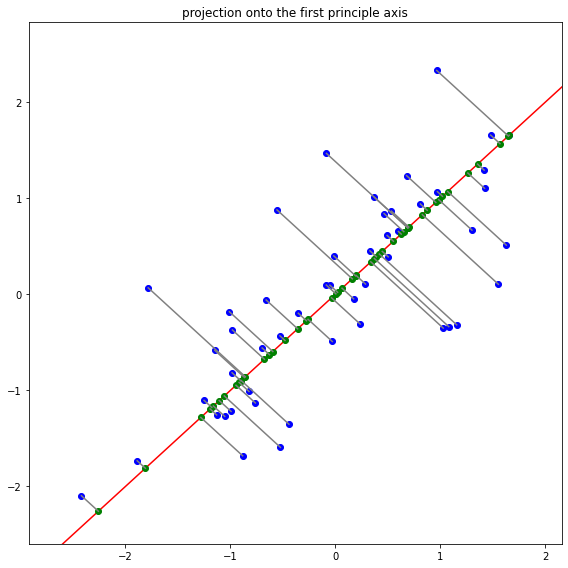

**************************************************
## [RESULT 08]
**************************************************


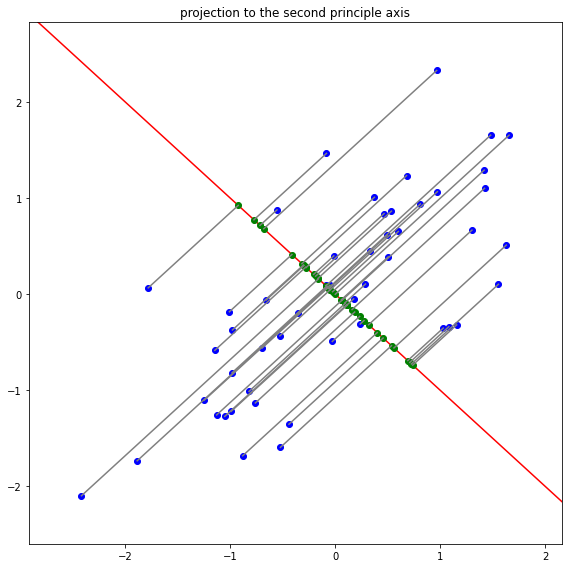

In [18]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)